In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import json 
import ctypes 
import tifffile 

from scipy import ndimage as nd

import pypore3d 
from pypore3d import *
from pypore3d.p3dFiltPy import *
from pypore3d.p3dBlobPy import *
from pypore3d.p3dSkelPy import *
from pypore3d.p3dSITKPy import *


from glob import glob 
from tqdm import tqdm 

from poreUtils import *

In [2]:
data_dir = 'D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm\\result\\'
#data_dir = 'D:\\sagar\\Data\\MD_1264_A18\\'
# roi specification 
x, y, z = 300, 300, 300
res = 0.002 # 2 micron 

rois = glob(data_dir + '*.raw')

In [3]:

for roi in tqdm(rois[0:1]):
    result = {}
    # Reading the file 
    volc = py_p3dReadRaw8(roi, x, y, z)
    # Appying Median filter for removing noise
    volc = py_p3dMedianFilter8(volc, x, y, z, width=3)
    # convert it to numpy array for manual thresholding and a bit processing which are easy in numpy array
    vol = swigObjt2uint8Array(volc, x, y, z)
    th_vol = vol < 55 
    th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
    # From binary to 0-255
    th_vol = norm8bit(th_vol, 0, 1)
    # Converting back to py_p3d data format to be able to use the functionality 
    th_vol.tofile('th_vol.raw')
    th_volc = py_p3dReadRaw8('th_vol.raw', x, y, z)
    #os.remove('th_vol.raw')
    
    # Basic Analysis
    basic_stats = py_p3dBasicAnalysis(th_volc, x, y, z, resolution=res)
    basic_anaysis = formatBasicStats(basic_stats, definition=True)
    result['basic_analysis'] = basic_anaysis
    
    
    # Anisotropy Analysis
    anisotropy_stats = py_p3dAnisotropyAnalysis(th_volc, x, y, z, resolution=res)
    anisotropy_analysis = formatAnisotropyStats(anisotropy_stats, definition=True)
    result['anisotropy_analysis'] = anisotropy_analysis
    
    # Blob Analysis 
    blob_stats, blob_im, star_im = py_p3dBlobAnalysis(th_volc, x, y, z, resolution=res)
    blob_analysis = formatBlobStats(blob_stats, definition=True)
    result['blob_analysis'] = blob_analysis
    
#     jsonString = json.dumps(result)
#     jsonFile = open(roi.split('_8bit')[0] + '.json', "w")
#     jsonFile.write(jsonString)
#     jsonFile.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.30s/it]


In [4]:
rois[0:1]

['D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm\\result\\1000-1300x1000-1300x2000-2300_8bit.raw']

In [4]:
blob_vol = swigObjt2uint8Array(blob_im, x, y, z)
star_vol = swigObjt2uint8Array(star_im, x, y, z)

In [6]:
blob_vol.shape

(300, 300, 300)

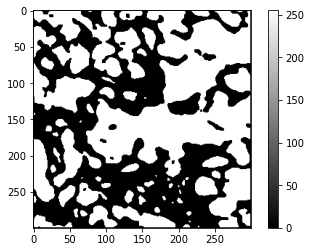

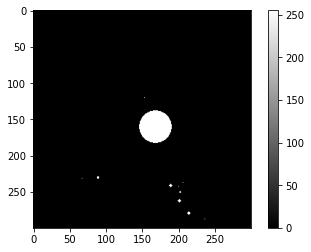

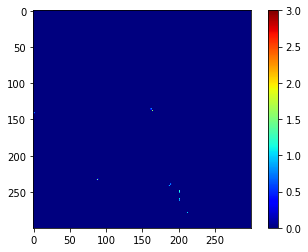

In [25]:
sliNo = 150
plt.imshow(th_vol[sliNo, :, :], cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(blob_vol[sliNo, :, :], cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(star_vol[sliNo, :, :], cmap='jet')
plt.colorbar()
plt.show()

In [20]:
th_volcV = swigObjt2uint8Array(th_volc, x, y, z)

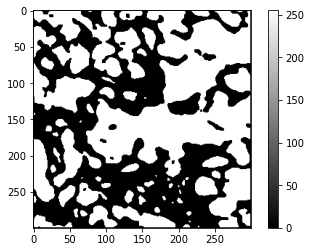

In [22]:
plt.imshow(th_volcV[150, :, :], cmap='gray')
plt.colorbar()
plt.show()

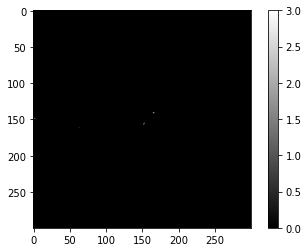

In [24]:
plt.imshow(star_vol[159, :, :], cmap='gray')
plt.colorbar()
plt.show()

In [33]:
np.unique(star_vol)

array([0, 1], dtype=uint8)

In [29]:
blob_vol.tofile('blob_vol' + '_8bit.raw')
star_vol.tofile('star_vol' + '_8bit.raw')

In [6]:
star_vol.shape

(300, 300, 300)

In [21]:
np.unique(cen_star)

array([False,  True])

In [32]:
star_vol[star_vol > 1] = 0

In [34]:
star_vol.tofile('star_vol2' + '_8bit.raw')

In [49]:
%matplotlib notebook

<IPython.core.display.Javascript object>


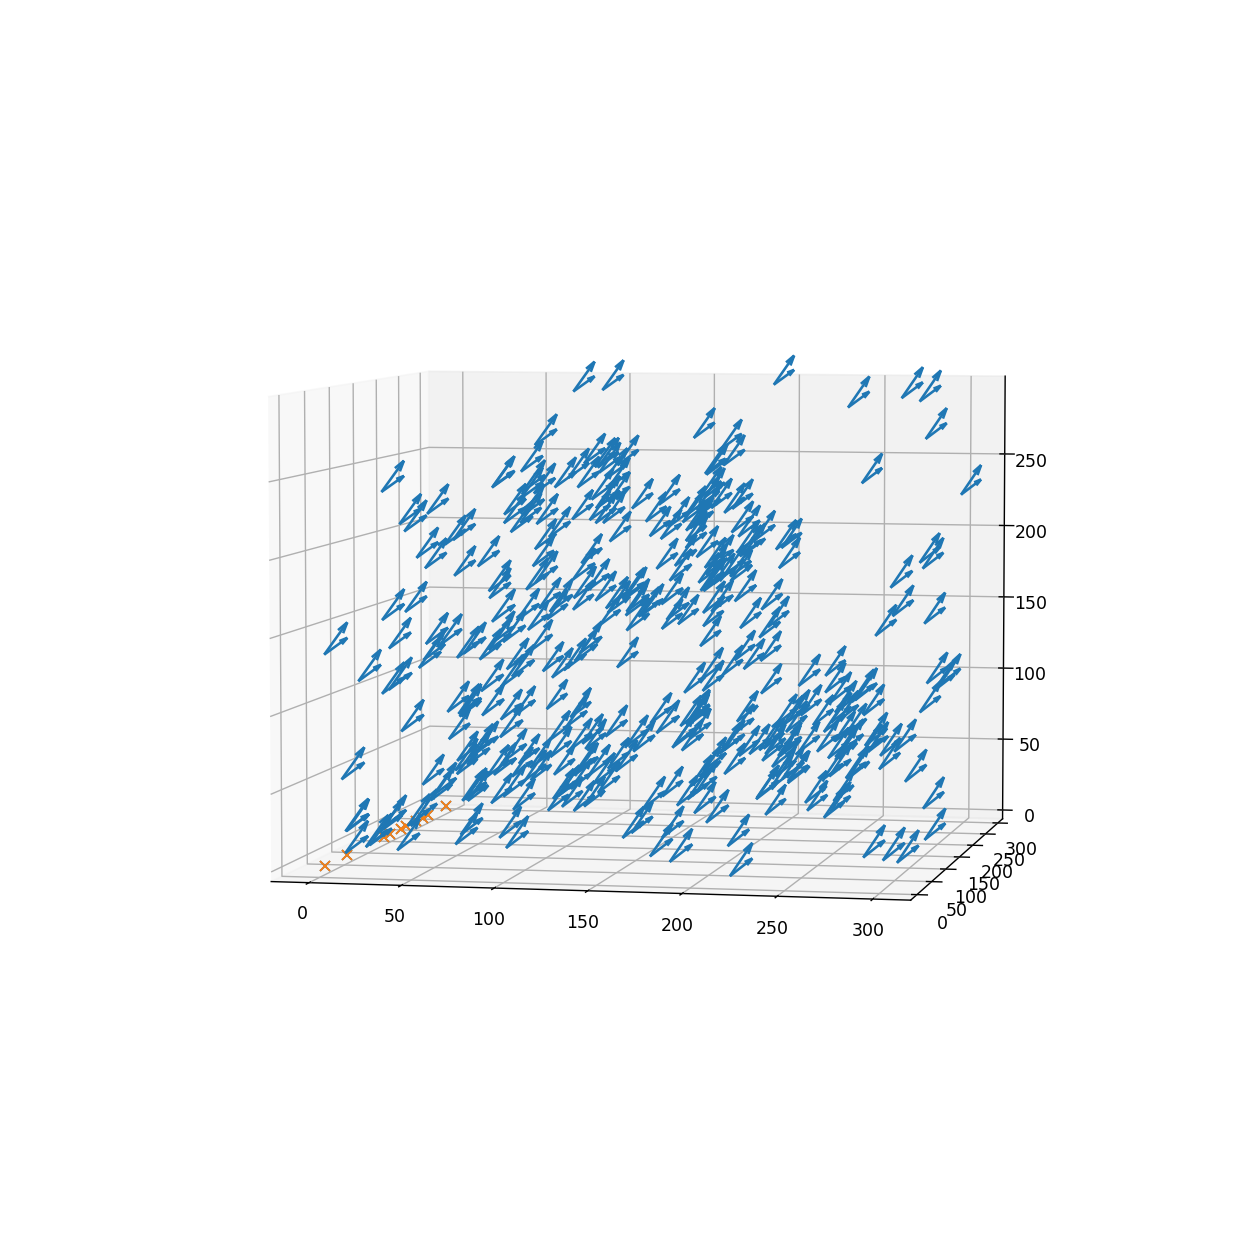

In [127]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

# Make the grid
x, y, z = np.array(pos[0]), np.array(pos[1]), np.array(pos[2])

# Make the direction data for the arrows
u = 10
v = 10
w = 10

ax.quiver(x, y, z, u, v, w, length=1)
ax.quiver(x, y, z, 10, 10, 20, length=1)


plt.show()

In [116]:
x_ = x[175] - x

y_ = y[175] - y

z_ = z[175] - z

<IPython.core.display.Javascript object>


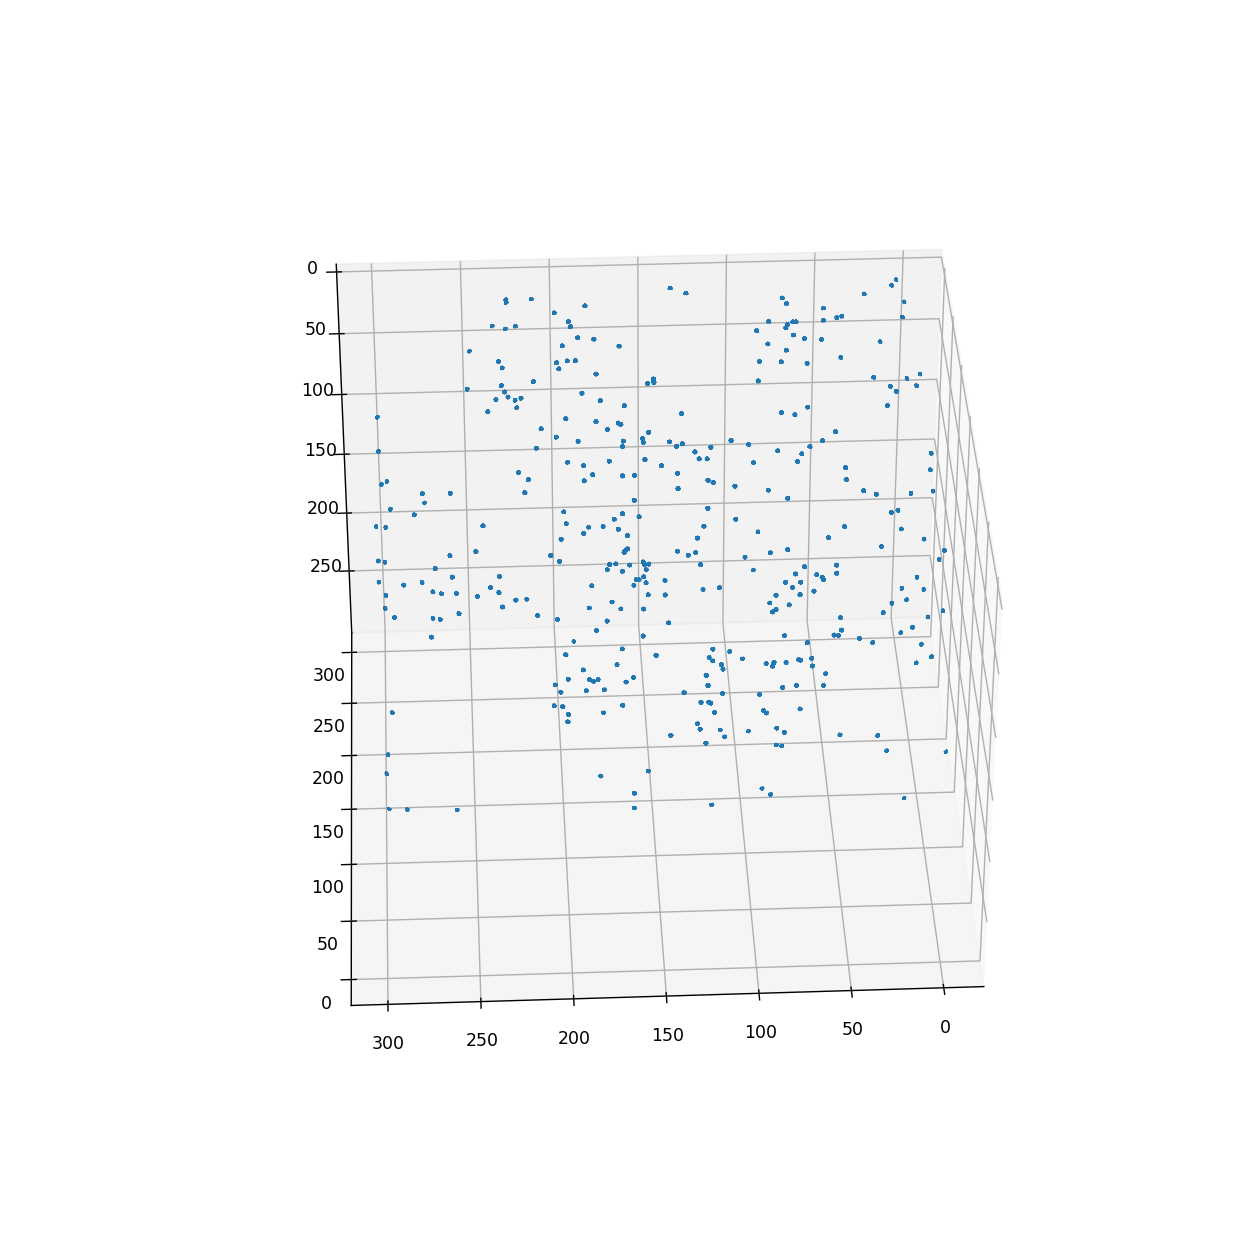

In [126]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

for i in range(0,363):
    x_ = x[i] - x
    y_ = y[i] - y
    z_ = z[i] - z
    
    for j in range(0,363):
        #if abs(x_[i]) < 40 and abs(y_[i])<40 and abs(z_[i])<40:
            #print(x_[i], y_[i], z_[i])
        ax.quiver(x[i], y[i], z[i], x_[j], y_[j], z_[j], length=1, normalize=True)


plt.show()
    

In [128]:
pos = np.where(star_vol==1)

<IPython.core.display.Javascript object>


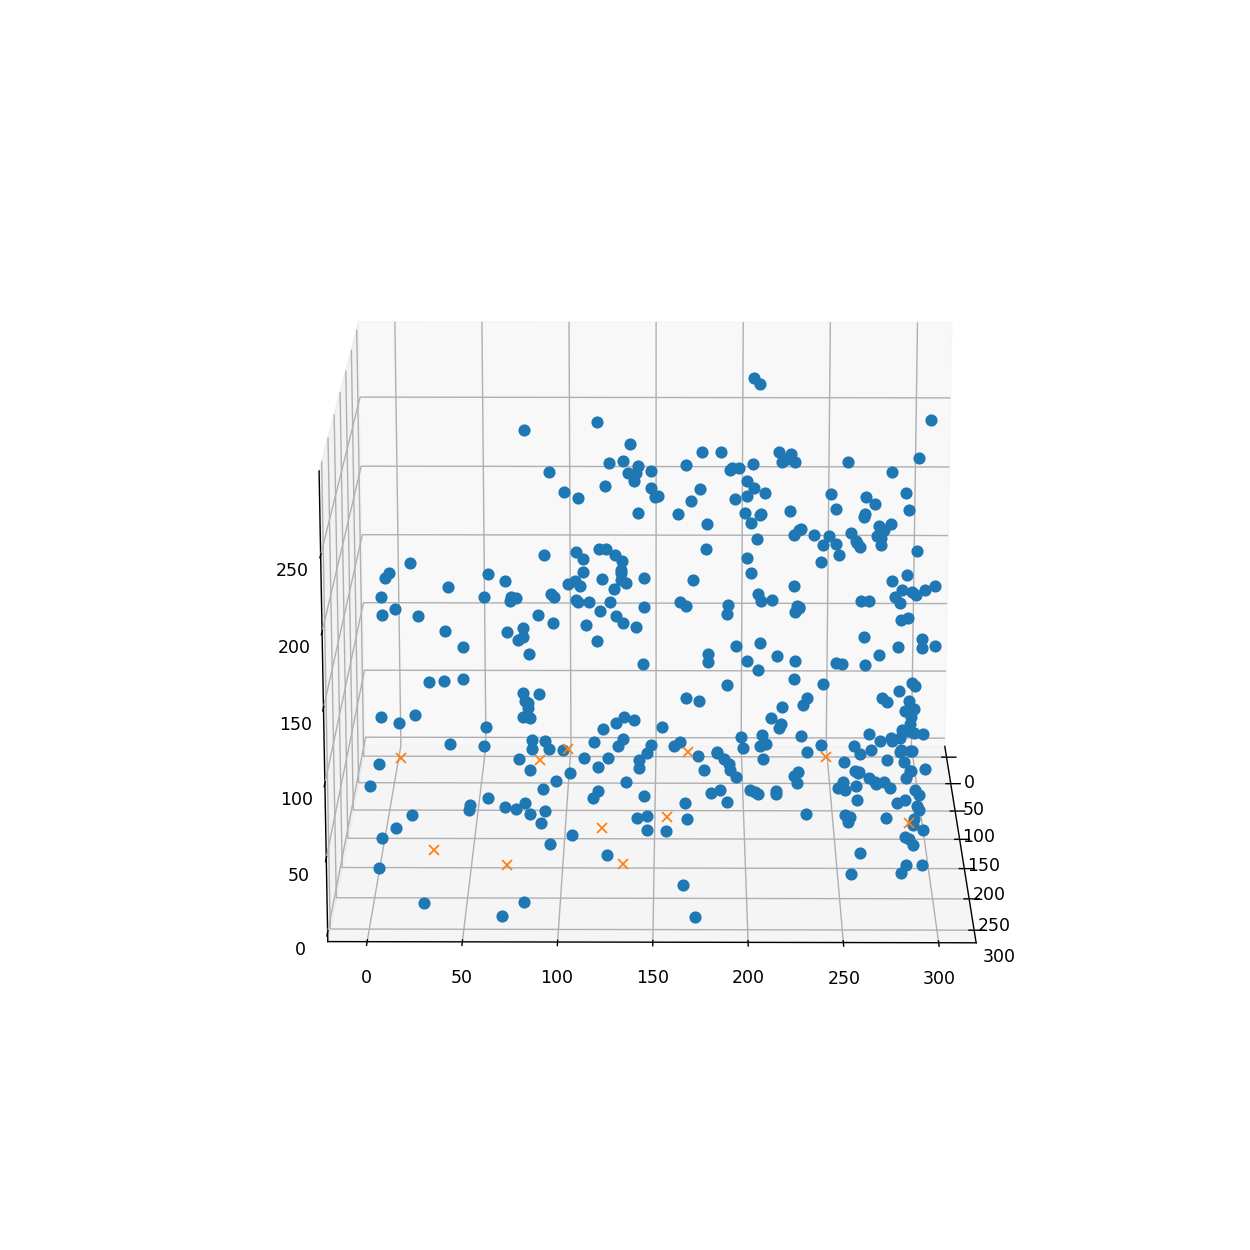

In [143]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
plt.plot(pos[0], pos[1], pos[2], 'o')
plt.show()

In [5]:
pos = np.where(star_vol==1)

In [6]:
pos[2][0:11]

array([137,  16,   7, 126, 208, 147,   1,  23, 210, 185,  19], dtype=int64)

In [7]:
299 - pos[1][0:11]

array([291, 248, 168, 156, 132, 120,  98,  82,  69,  28,   1], dtype=int64)

In [44]:
xcor = pos[2]
ycor = 299 - pos[1]
zcor = pos[0]

<IPython.core.display.Javascript object>


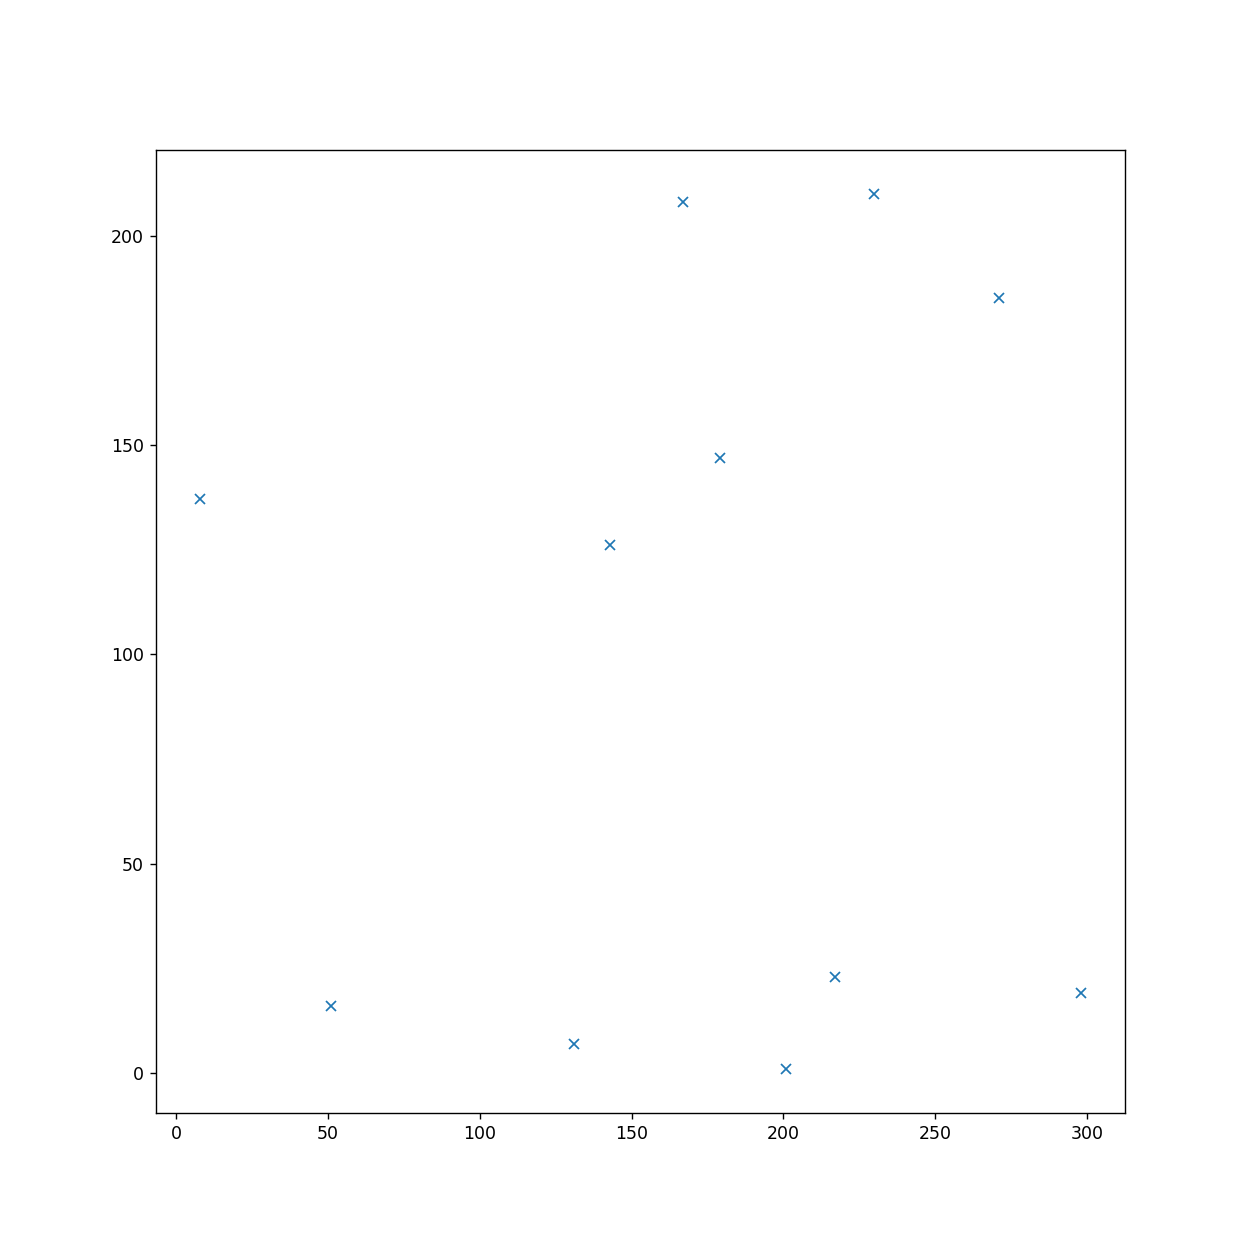

In [156]:
ax = plt.figure(figsize=(10,10)).add_subplot()
ax.plot(pos[1][0:11], pos[2][0:11], 'x')
# p=5
# for i in range(0,11):
#     ax.quiver(ycor[p], xcor[p], xcor[i]-xcor[p], ycor[i]-ycor[p], angles='xy', scale_units='xy', scale = 1)
plt.show()

<IPython.core.display.Javascript object>


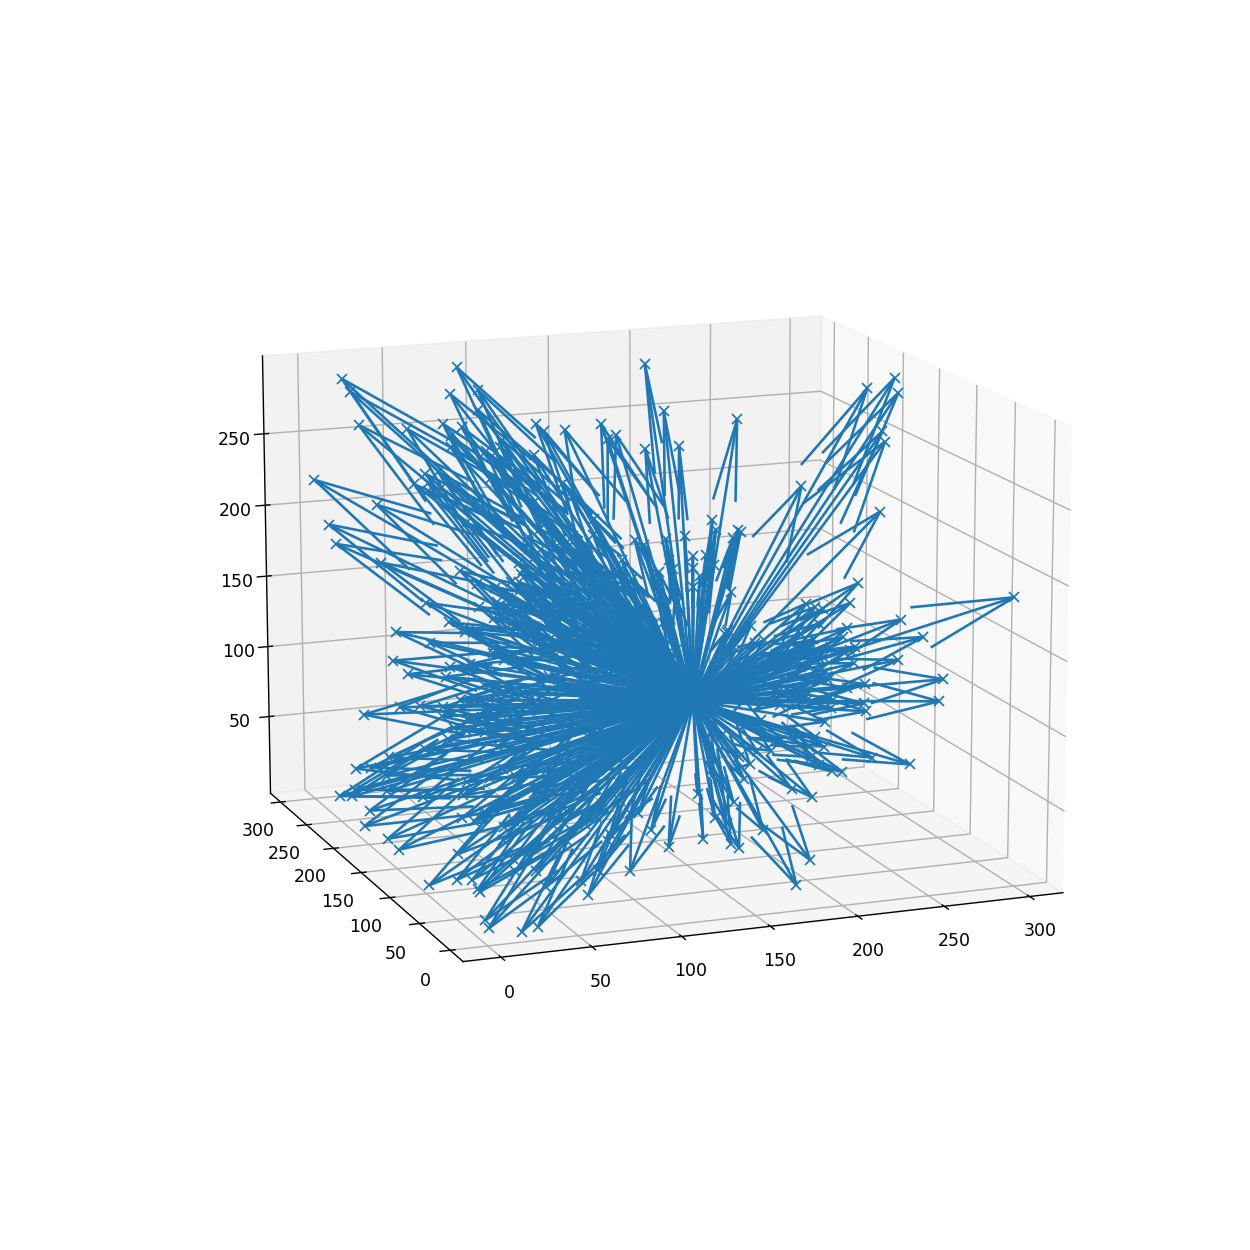

In [51]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.plot(pos[2], 299-pos[1], pos[0], 'x')
p=156
for i in range(0,363):
    ax.quiver(xcor[p], ycor[p], zcor[p], xcor[i]-xcor[p], ycor[i]-ycor[p], zcor[i]-zcor[p],)
plt.show()

<IPython.core.display.Javascript object>


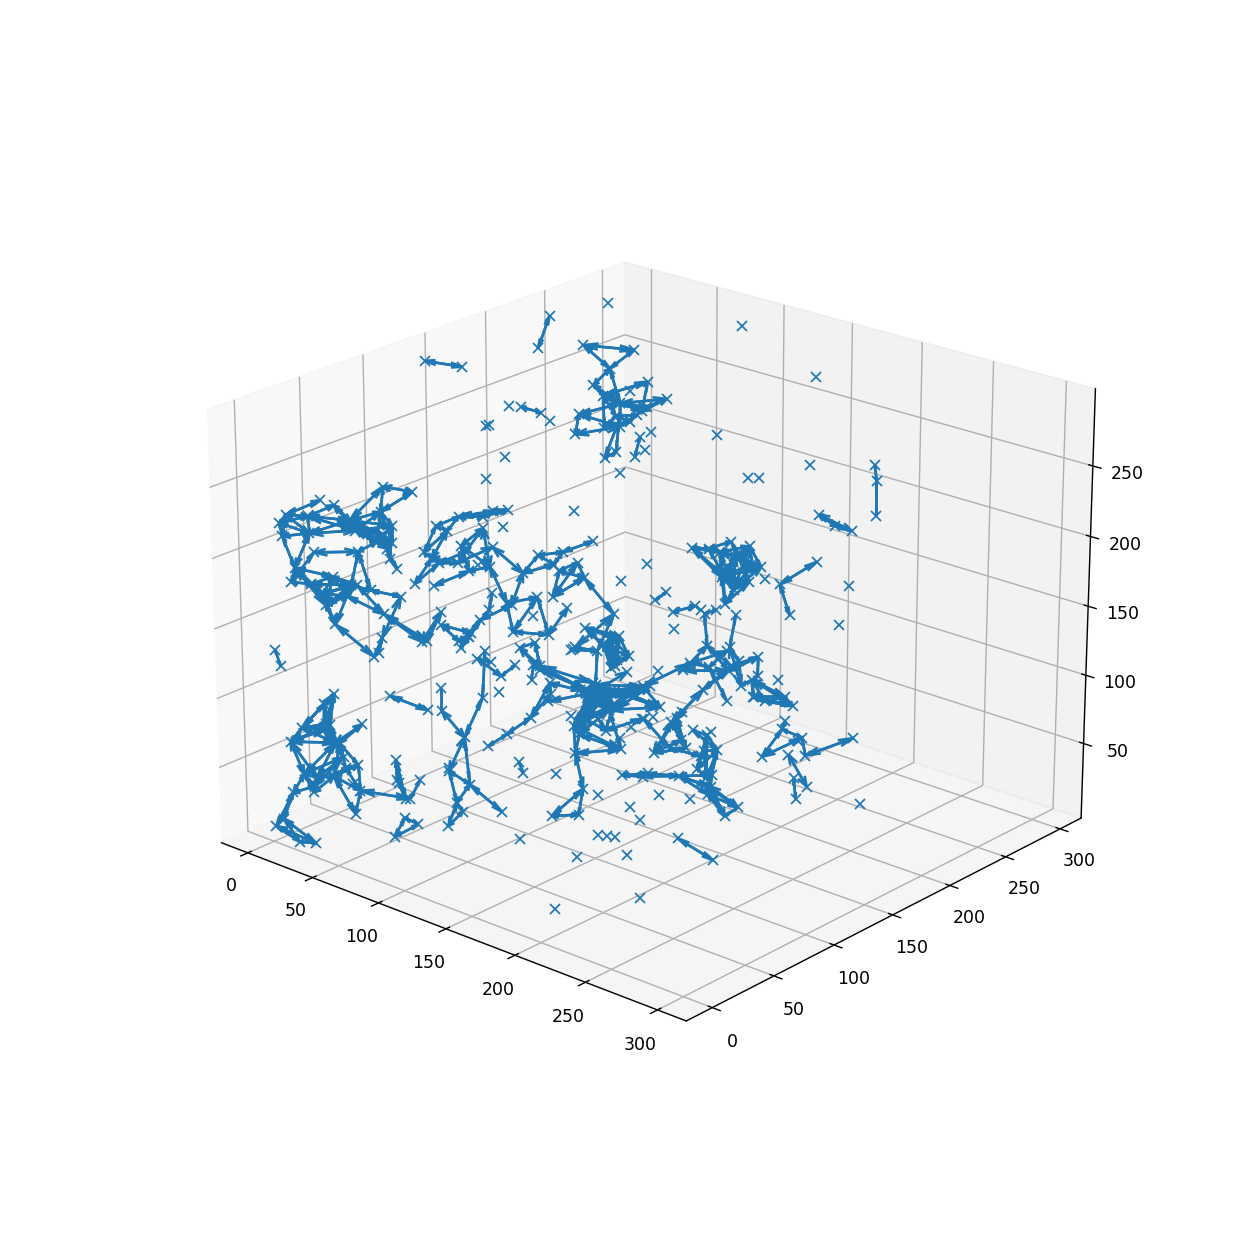

In [61]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.plot(pos[2], 299-pos[1], pos[0], 'x')

for i in range(0,363):
    for j in range(0,363):
        dist = np.sqrt(pow((xcor[j]-xcor[i]),2)+pow((ycor[j]-ycor[i]),2)+pow((zcor[j]-zcor[i]),2))
        if dist < 30:
            ax.quiver(xcor[i], ycor[i], zcor[i], xcor[j]-xcor[i], ycor[j]-ycor[i], zcor[j]-zcor[i],)
plt.show()

In [55]:
np.sqrt(9)

3.0

In [62]:
centerOfBlobs = []
for i in range(0,363):
    cor = [xcor[i], ycor[i], zcor[i]]
    centerOfBlobs.append(cor)
    

In [64]:
centerOfBlobs = np.asarray(centerOfBlobs)

In [65]:
centerOfBlobs

array([[137, 291,   1],
       [ 16, 248,   1],
       [  7, 168,   1],
       ...,
       [296, 158, 298],
       [270, 136, 298],
       [223,   3, 298]], dtype=int64)

In [66]:
from scipy.spatial.distance import pdist, squareform

distCorMat = squareform(pdist(centerOfBlobs))

In [67]:
distCorMat

array([[  0.        , 128.41339494, 178.96647731, ..., 362.18641609,
        360.44833194, 422.55058869],
       [128.41339494,   0.        ,  80.50465825, ..., 417.98205703,
        406.5329015 , 437.13041532],
       [178.96647731,  80.50465825,   0.        , ..., 414.5238232 ,
        397.99748743, 402.60402382],
       ...,
       [362.18641609, 417.98205703, 414.5238232 , ...,   0.        ,
         34.05877273, 171.33009076],
       [360.44833194, 406.5329015 , 397.99748743, ...,  34.05877273,
          0.        , 141.06027081],
       [422.55058869, 437.13041532, 402.60402382, ..., 171.33009076,
        141.06027081,   0.        ]])

In [69]:
distCorMat.shape

(363, 363)

<IPython.core.display.Javascript object>


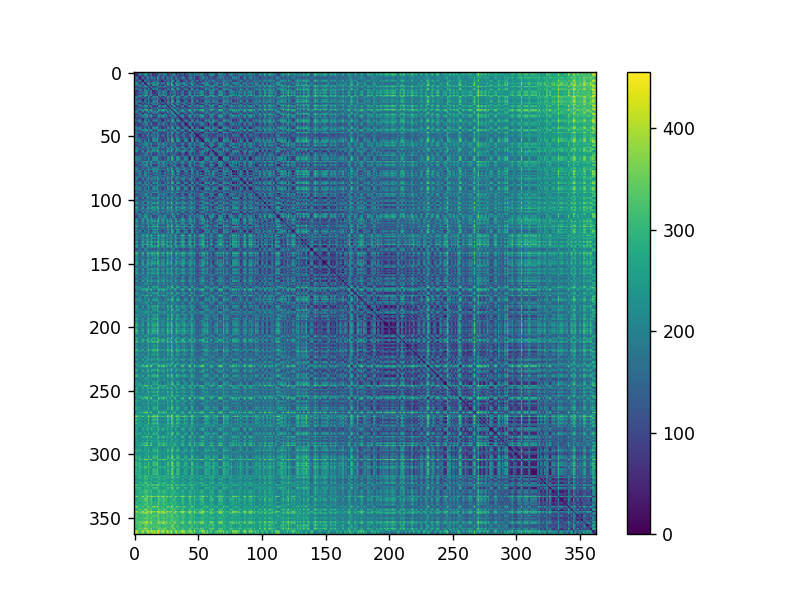

In [89]:
fig = plt.figure()
plt.imshow(distCorMat, )
plt.colorbar()
plt.show()

In [75]:
np.sqrt(pow((137-16),2)+pow((291-248),2)+pow((1-1),2))

128.41339493993607

<IPython.core.display.Javascript object>


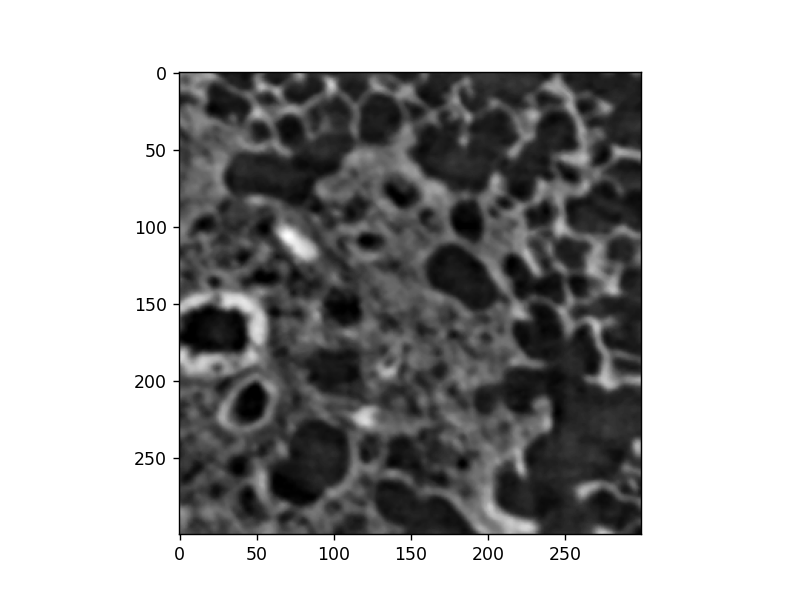

In [96]:
fig = plt.figure()
plt.imshow(vol[1, :, :], cmap='gray')

In [87]:
th_roi = vol > 40

<IPython.core.display.Javascript object>


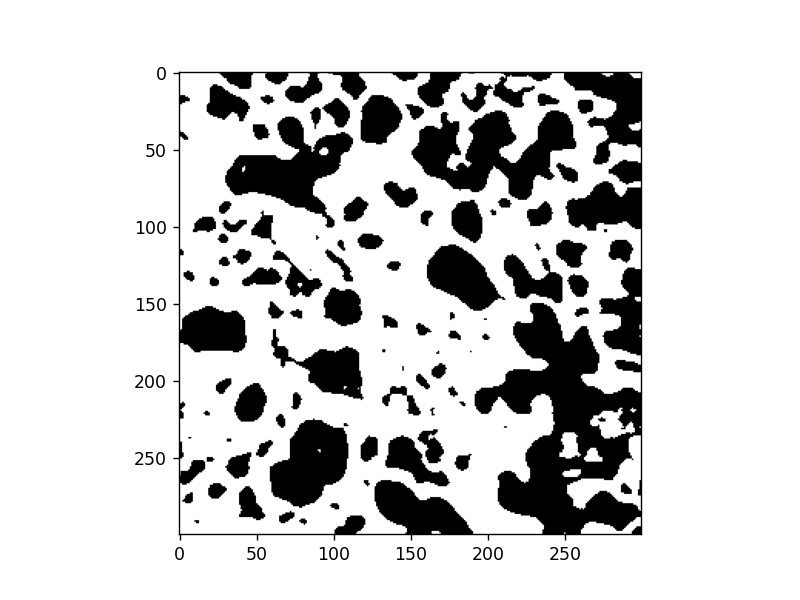

In [97]:
fig = plt.figure()
plt.imshow(th_roi[1, :, :], cmap='gray')

In [98]:
from scipy import ndimage as nd
from scipy.ndimage import distance_transform_edt

In [104]:
th_roi = nd.binary_closing(th_roi, np.ones((3,3,3)))
dis3d = distance_transform_edt(th_roi)
dis3d[dis3d < 4] = np.nan

<IPython.core.display.Javascript object>


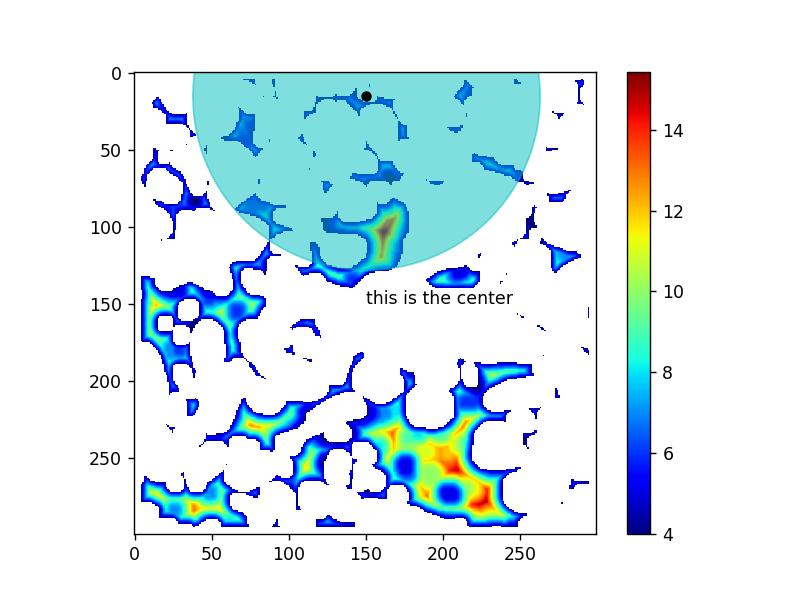

In [141]:
fig = plt.figure()
plt.imshow(dis3d[150, :, :], cmap='jet')
plt.plot(150, 15, 'oc', markersize=200, alpha=0.5, )
plt.plot(150, 15, 'ok', markersize=5, alpha=1, )
plt.text(150, 150, 'this is the center')
plt.colorbar()

In [149]:
xcor = pos[2]
ycor = pos[1]
zcor = pos[0]

<IPython.core.display.Javascript object>


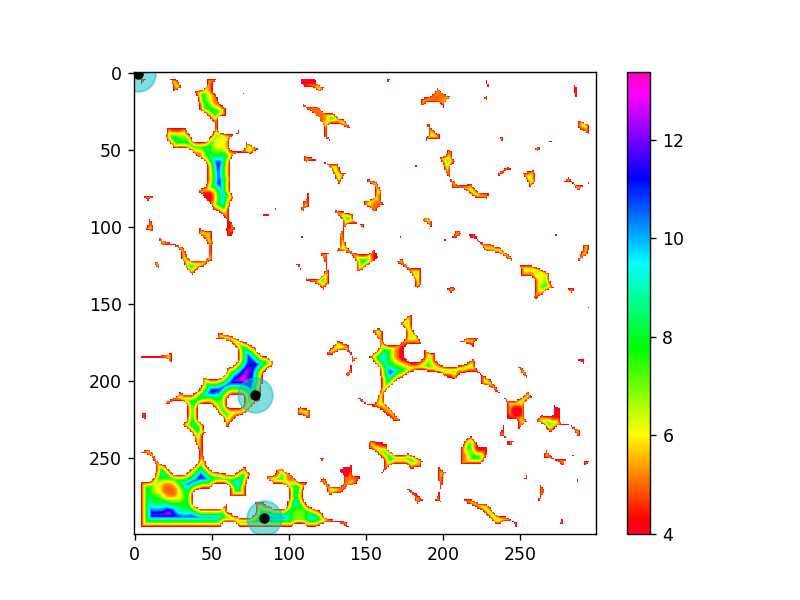

2 1
78 209
84 289


In [161]:
sliceNo = 221
fig = plt.figure()
plt.imshow(dis3d[sliceNo, :, :], cmap=plt.cm.gist_rainbow)
for c in range(0, len(zcor)):
    if zcor[c] == sliceNo:
        plt.plot(xcor[c], ycor[c], 'oc', markersize=20, alpha=0.5, )
        plt.plot(xcor[c], ycor[c], 'ok', markersize=5, alpha=1, )
        print(xcor[c], ycor[c])
plt.colorbar()
plt.show()
        
        
        
    
    

In [143]:
zcor

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
         2,   3,   4,   4,   4,   6,   6,   7,   7,   9,   9,  10,  10,
        12,  13,  13,  14,  15,  16,  19,  24,  24,  25,  25,  25,  25,
        26,  26,  32,  32,  36,  37,  38,  39,  39,  41,  43,  44,  44,
        46,  47,  47,  48,  49,  49,  49,  50,  50,  51,  52,  53,  54,
        55,  55,  55,  57,  58,  59,  59,  62,  62,  63,  63,  65,  65,
        65,  66,  66,  67,  67,  68,  68,  69,  69,  69,  70,  70,  70,
        70,  70,  71,  71,  72,  72,  72,  72,  73,  75,  76,  76,  76,
        77,  77,  77,  78,  78,  79,  80,  80,  81,  81,  82,  82,  82,
        82,  83,  83,  84,  84,  85,  85,  87,  87,  88,  89,  90,  91,
        91,  92,  92,  92,  93,  94,  95, 102, 105, 105, 105, 107, 108,
       108, 110, 112, 112, 113, 113, 113, 114, 115, 116, 116, 116, 117,
       117, 118, 119, 120, 120, 121, 121, 123, 123, 123, 124, 124, 124,
       124, 125, 125, 126, 130, 130, 131, 133, 133, 133, 133, 13

In [118]:
star_vol12 = star_vol
star_vol12[star_vol12 > 2] = 0

In [120]:
star_vol12.tofile('star_vol12' + '_8bit.raw')

In [121]:
np.unique(star_vol)

array([0, 1, 2], dtype=uint8)

In [125]:
np.count_nonzero(star_vol12==2)

422

In [126]:
363+422

785

In [127]:
np.count_nonzero(star_vol12)

785